<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [44]:
folder = '/content/drive/MyDrive/Hinhcuoiki/Train/'

photos, labels = list(), list()
for file in listdir(folder) :

  if file.startswith('Sup'):
    output = 0.0
  if file.startswith('Sad'):
    output = 1.0
  if file.startswith('Neu'):
    output = 2.0
  if file.startswith('Hap'):
    output = 3.0
  if file.startswith('Fear'):
    output = 4.0
  if file.startswith('Angry'):
    output = 5.0
  if file.startswith('Disgust'):
    output = 6.0
  photo = load_img(folder + file, target_size = (48,48))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Mon AI/Train_photo.npy',photos_train)
save('/content/drive/MyDrive/Mon AI/Train_label.npy',labels_train)


(1900, 48, 48, 3) (1900,)


In [45]:
folder = '/content/drive/MyDrive/Hinhcuoiki/Test/'
photos, labels = list(), list()
for file in listdir(folder) :

  if file.startswith('Sup'):
    output = 0.0
  if file.startswith('Sad'):
    output = 1.0
  if file.startswith('Neu'):
    output = 2.0
  if file.startswith('Hap'):
    output = 3.0
  if file.startswith('Fear'):
    output = 4.0
  if file.startswith('Angry'):
    output = 5.0
  if file.startswith('Disgust'):
    output = 6.0
  photo = load_img(folder + file, target_size = (48,48))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/Mon AI/Test_photo_test.npy',photos_test)
save('/content/drive/MyDrive/Mon AI/Test_photo_test.npy',labels_test)

(350, 48, 48, 3) (350,)


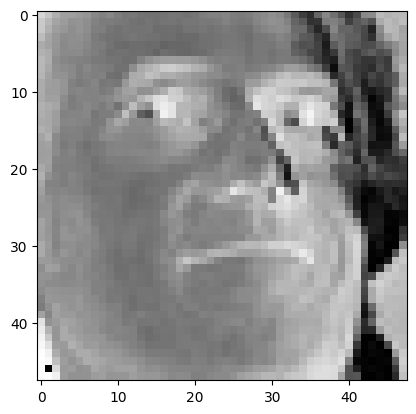

In [46]:
import matplotlib.pyplot as plt
import numpy as np
chosen_idx = 2
chosen_img = photos_train[chosen_idx]
plt.imshow((chosen_img*255).astype(np.uint8))
plt.show()

In [47]:
photos_train = photos_train.reshape(1900,48, 48, 3)
photos_train = photos_train.astype('float32')/255
photos_test = photos_test.reshape( 350,48, 48, 3)
photos_test = photos_test.astype('float32')/255

from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((1900, 48, 48, 3), (1900, 7), (350, 48, 48, 3), (350, 7))

In [54]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size =64
epochs = 30
classes = 7

model = Sequential()
#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (48,48,3), padding = 'same'))
# nhan tich chap 32 lan
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))

In [55]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size ,
                  epochs = epochs, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                 

In [56]:
model.save('/content/drive/MyDrive/Mon AI/data.h5')

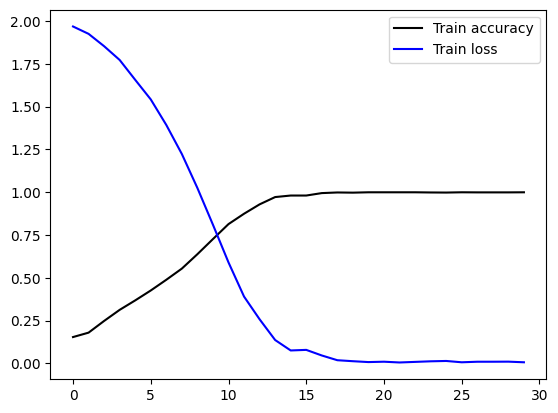

In [57]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()
